# L'Analyse des correspondances principales 

----

Ce notebook est dédié à l'analyse en composantes principales (ACP ou PCA en anglais pour principal component analysis).   
   
Introduite par les travaux de Karl Pearson en 1901 et mise au point par Hotelling en 1933, cette méthode qui emprunte à la géométrie, à l'algèbre linéaire et à la statistique fait partie de la grande famille des analyses de données multivariées et plus précisément des analyses factorielles.    
Son principe est de traiter par le calcul un grand nombre de données quantitatives complexes et parfois redondantes afin de mettre en lumière certaines corrélations particulièrement fortes. C'est donc un outil précieux aussi bien en sciences des données qu'en sciences humaines et sociales.   
   
Plus techniquement, réaliser une ACP consiste à construire à partir de la combinaison linéaire de variables initiales de nouvelles variables, appelées facteurs, qui pourront être subsituées aux variables initiales par une opération de changement de base. L'intérêt de cette opération réside dans le fait que les nouvelles variables ainsi obtenues sont non-corrélées entre elles et de variance maximale : elles offrent une bonne synthèse de l'information contenues dans nos données. Le choix des facteurs principaux permet ensuite de réduire le nombre de variables considérées tout en minimisant la perte d'information. Une application très courante de cette réduction de dimensionalité consiste à visualiser la structure des données en dimension réduite (le plus souvent sur un plan 2D).


---

Il existe une vaste littérature sur le traitement informatisé des données quantitatives. Cependant, il nous a semblé que les travaux existants étaient d'une part majoritairement dédiés non pas à Python mais à R (logiciel libre dédié aux statistiques et qui possède son propre langage également appelé R) et que, d'autre part, ces travaux se présentaient davantage sous la forme de tutoriels pour la réalisation pratique de l'ACP, sans rappel sur la théorie  sous-tendue par cette méthode.  
L'objectif de ce notebook est donc triple : 
   - écrire un algorithme d'ACP sur Python qui reprennent les résultats et les visualisations proposées par R ;
   - enrichir la gamme et les fonctionalités de visualisations grâce à la richesse des bibliothèques Python et ainsi donner un premier aperçu de ce qu'un chercheur en sciences sociales pourrait gagner à se familiariser avec la programmation dans ce langage ;  
   - rappeler à l'utilisateur practicien les fondements théoriques de l'ACP, pour qu'ils puissent s'en servir efficacement et avec un minimum d'erreurs, tout en conservant une approche empirique, avec pour objectif de concilier la rigueur nécessaire à la compréhension de l'instrument d'analyse sans pour autant rebuter le lecteur par un trop grand formalisme.



-----

## Bibliothèques utilisées 

****

Dans ce tutoriel, nous nous servirons de six bibliothèques : pandas, numpy, scipy, matplotlib, seaborn et bokeh.  
     
   
 - pandas est la bibliothèque dédiée à la manipulation des données en Python. À ce titre, sa maîtrise est indispensable pour l'analyse de données dans ce langage.
   
   
 - numpy structure les données sous formes de ndarray (c'est-à-dire de tableaux multidimensionnels assimilables à des matrices). Cette bibliothèque nous permettra d'effectuer les calculs matriciels nécessaire aux traitements des données.   
 
   
 - scipy est une bibliothèque dédiée au calcul scientifique sur des objets de type ndarray utilisés par numpy. Bien que numpy fournisse un certain nombre de fonctions de calcul, scipy en contient davantage. La décomposition en valeur singulière dont nous avons besoin pour l'ACP n'est disponible que dans le module d'algèbre linéaire de scipy. 
 

 - matplotib est l'outil de visualisation associé à Numpy. Nous nous en servirons pour restituer nos résultats et rendre leur interprétation plus aisée.
 
 
 - seaborn est basé sur matplotlib mais permet des visualisations plus poussées. Cette bibliothèque est très utilisée pour les représentations graphiques de statistiques.
   
   
 - bokeh permet de faire des figures interactives.
 
 ---------------------

Importons ces bibiliothèques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource

Pour mieux comprendre l'un des nombreux intérêt de la bibliothèque pandas pour la manipulation des données, importons nos données telles qu'elles (ici en format .csv) et tentons la lecture des premiers lignes.


In [2]:
data = open("./donnees_ACP.csv", "r")
content = data.readlines(500)
content

[',SEXE,AGE,OA196_r1,OA196_r2,OA196_r3,OA196_r4,OA196_r5,OA196_r6,OA196_r7\n',
 '0,Un homme,45.0,-1,-1,0,-1,2,-1,-1\n',
 '1,Un homme,49.0,2,-1,1,-1,-1,1,2\n',
 '2,Une femme,54.0,1,1,1,1,1,1,1\n',
 '3,Un homme,57.0,-1,-1,2,1,-2,-1,1\n',
 '4,Une femme,44.0,2,-2,1,-2,-2,2,-1\n',
 '5,Un homme,70.0,1,-1,-1,-1,1,1,1\n',
 '6,Une femme,84.0,-1,1,-1,2,1,0,1\n',
 '7,Une femme,55.0,1,1,1,-1,1,1,1\n',
 '8,Un homme,45.0,2,-1,2,-1,-1,1,2\n',
 '9,Une femme,44.0,0,1,1,1,1,1,1\n',
 '10,Une femme,24.0,1,2,1,-1,1,2,1\n',
 '11,Un homme,67.0,2,0,0,-2,-2,-2,0\n',
 '12,Un homme,88.0,1,2,1,1,2,1,1\n']

Plusieurs remarques peuvent être faites. 
- lecture, visualisation des données   
   
Tout d'abord la lecture des données est compliquées : il est difficile d'avoir un aperçu du nombre d'individus (parmi les 12 premiers) qui ont répondu 0 à la 5ème question.

- accès à une ou plusieurs données spécifiques   
   
De plus, leur manipulation peut s'avérer complexe  : obtenir la réponse du 7ième individu à la question 5 est bien moins direct que sur un tableau excel par exemple.
   
- transformation, nettoyage   
   
Enfin, nous souhaitons pouvoir modifier facilement nos données, ce que ce format ne permet pas. 

   ------
   
Il est temps d'importer nos données en format en pandas. Nous utiliserons la méthode .head() pour afficher les 5 premières lignes de données.

In [3]:
df = pd.read_csv("/Users/ariane/Downloads/donnees_ACP.csv")
df.head()

,Unnamed: 0,SEXE,AGE,OA196_r1,OA196_r2,OA196_r3,OA196_r4,OA196_r5,OA196_r6,OA196_r7
0,0,Un homme,45.0,-1,-1,0,-1,2,-1,-1
1,1,Un homme,49.0,2,-1,1,-1,-1,1,2
2,2,Une femme,54.0,1,1,1,1,1,1,1
3,3,Un homme,57.0,-1,-1,2,1,-2,-1,1
4,4,Une femme,44.0,2,-2,1,-2,-2,2,-1


Nous pouvons d'ores et déjà constater une amélioration sur le plan de la visualisation des données.   
Tentons d'obtenir les réponses du 7ème individu (attention la numérotation des index commence à 0 et non à 1).

In [4]:
df.loc[6]

Unnamed: 0            6
SEXE          Une femme
AGE                  84
OA196_r1             -1
OA196_r2              1
OA196_r3             -1
OA196_r4              2
OA196_r5              1
OA196_r6              0
OA196_r7              1
Name: 6, dtype: object

Quelle a été sa réponse à la question n°5 (OA196_r5) ?

In [5]:
 df.loc[6,'OA196_r5']

1

La lecture des données et l'accès à l'information sont donc grandement simplifiés par pandas. Il en va de même pour la transformation des données.    
Nous souhaitons réaliser note analyse sur les colonnes OA196_r1, OA196_r2, OA196_r3, OA196_r4, OA196_r5, OA196_r6, OA196_r7. Débarrassons nous des 3 premières colonnnes.

In [6]:
df = df[df.columns[3:]]
df

,OA196_r1,OA196_r2,OA196_r3,OA196_r4,OA196_r5,OA196_r6,OA196_r7
0,-1,-1,0,-1,2,-1,-1
1,2,-1,1,-1,-1,1,2
2,1,1,1,1,1,1,1
3,-1,-1,2,1,-2,-1,1
4,2,-2,1,-2,-2,2,-1
...,...,...,...,...,...,...,...
2001,2,0,0,1,1,0,1
2002,1,-1,0,-1,-1,0,1
2003,2,-2,1,-2,-2,-2,1
2004,2,-1,1,-2,-2,1,1


On peut remarquer que pandas n'affiche par défaut que les 5 premières et les 5 dernières lignes de données.  
Il est possible d'afficher le tableau dans sa totalité ainsi : pd.set_option('display.max_rows', X.shape[0])   
De nombreux autres fonctionnalités sont disponibles (accès à une colonne, manipulation des index, création ou suppression de nouvelles colonnes ou lignes, modification des données, gestion des valeurs manquantes, etc.). 
Il vous est donc fortement recommandé de vous référer à la documentation pandas pour découvrir tout ce que cette bibliothèque peut vous permettre de faire.

---
---

   
Grâce à pandas, nous avons pu avoir un premier aperçu de nos données, les manipuler voire les modifier.  
Nous souhaitons désormais nous lancer dans une analyse des composantes principales.
   
---

Les analyses de données dites "à la française" consistent en une série d'opération d'algèbre matriciel. L'objectif de ces procédés est de représenter les données multidimensionnelles initiales dans un espace de dimension inférieure pour faciliter leur interprétation, tout en minimisant la perte d'information liée à cette réduction de dimnensionalité.
   
Or qui dit calcul matriciel, dit utilisation de ndarray numpy.

Transformons notre dataframe pandas en ndarray (matrice) numpy de floats et calculons les dimensions de cette matrice.

In [7]:
X = df.to_numpy().astype(float)
n, p = X.shape
n, p

(2006, 7)

---


---
## Calcul de la matrice des poids   
  
A priori, on accorde la même importance à tous les individus. Tous nos individus "comptent pour un".  
Le poids $p_{i}$ associé à chaque individu $i\in\{1,...,n\}$ est inversement proportionnel à la taille de l'échantillon tel que $p_{i} = 1/n, \forall i\in\{1,...,n\}$

  
Ainsi, sans le cas usuel, la matrice D des poids est données par :

In [8]:
D = (1/n)*np.eye(n) # la fonction np.eye(n) permet de créer une matrice identité de dimension n.   

Il est parfois utile de pouvoir modifier le poids attribué à chaque individu (par exemple lorsque les données sont regroupées, qu'il faut les redresser ou encore lorsque l'on souhaite calculer des corrélations sans certains individus).

## Calcul du centre de gravité du nuage

Chacun individu est un point défini par p coordonnées : pour l'individu $i\in\{1,...,n\}, x_i = (x_i^1,...,x_i^p)$. Autrement dit c'est un point dans un espace à p dimensions appelé l'espace des individus.   
Dans cet espace, l'ensemble des n individus forme un nuage de points. 
On peut calculer le centre de gravité g de ce nuage. 
g est lui-même un point de l'espace des individus. Chacune des $g^{j\in\{1,...,p\}}$ coordonnées est la moyenne arithmétique des coordonnées $x^j $ des individus.
g = ($\bar{x^1},\bar{x^2},..., \bar{x^p}$)

In [9]:
g = X.T.dot(D) .dot(np.ones(n))  # np.ones((n,p)) crée une matrice de dimension nxp ne contenant que des 1 (par défaut np.ones(n)= np.ones((n,)))
g

array([0.74526421, 0.47457627, 0.83848455, 0.23130608, 0.07427717,
       0.64057827, 0.75672981])

## Tableau centré associé à X

Le tableau des données centrées est la matrice Y tel que $y_i^j = x_i^j - \bar{x^j}$   
Ce qui est équivalent à $y_i^j = x_i^j - g^j$


In [10]:
Y = X - g.T 

## Calcul de la matrice de variance-covariance 

La matrice de variance-covariance des p variables est telle que   
\begin{equation*}
V_{p,p} = 
\begin{pmatrix}
s_1^2 & s_{1,2} & \cdots & s_{1,p} \\
s_{2,1} & s_2^2 & \cdots & s_{2,p} \\
\vdots  & \vdots  & \ddots & \vdots  \\
s_{p,1} & s_{p,2} & \cdots & s_p^2 
\end{pmatrix}
\end{equation*}

Avec
$\begin{align}
s_{k,l} & = 1/n \cdot {\sum_{i=1}^{n} x_i^k \cdot x_i^l}- \bar{x^k} \cdot \bar{x^l}, \ \ \forall k,l\in\{1,...,p\}
\end{align}$

D'où :   

\begin{matrix} 
V = X^T DX - gg^T 
\end{matrix}  
En effet : 
\begin{equation*}
X^T \cdot X = 
\begin{pmatrix}
    x_1^1 & x_2^1 & \cdots & x_n^1 \\
    x_1^2 & x_2^2 & \cdots & x_n^2 \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_1^p & x_2^p & \cdots & x_n^p 
\end{pmatrix}
\cdot
\begin{pmatrix}
    x_1^1 & x_1^2 & \cdots & x_1^p \\
    x_2^1 & x_2^2 & \cdots & x_2^p \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_n^1 & x_n^2 & \cdots & x_n^p 
\end{pmatrix} 
\end{equation*}

\begin{equation*}
X^T \cdot X = 
\begin{pmatrix}
    \sum_{i=1}^{n} x_i^1 \cdot x_i^1 & \sum_{i=1}^{n} x_i^1 \cdot x_i^2 & \cdots & \sum_{i=1}^{n} x_i^1 \cdot x_i^p \\
    \sum_{i=1}^{n} x_i^2 \cdot x_i^1 & \sum_{i=1}^{n} x_i^2 \cdot x_i^2 & \cdots & \sum_{i=1}^{n} x_i^2 \cdot x_i^p \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    \sum_{i=1}^{n} x_i^p \cdot x_i^1 & \sum_{i=1}^{n} x_i^p \cdot x_i^2 & \cdots & \sum_{i=1}^{n} x_i^p \cdot x_i^p 
\end{pmatrix}
\end{equation*}


Par ailleurs :

$
\begin{align*}
\sum_{i=1}^{n} y_i^k \cdot y^l_i & = \sum_{i=1}^{n} (x_i^k - \bar{x^k})(x_i^l - \bar{x^l}) \\
& = \sum_{i=1}^{n} (x_i^k \cdot x_i^l - x_i^k \cdot \bar{x^l} - \bar{x^k} \cdot x_i^l + \bar{x^k} \cdot \bar{x^l})\  par\ développement\ du\ produit \\
& = \sum_{i=1}^{n} (x_i^k \cdot x_i^l) - \bar{x^l} \cdot (\sum_{i=1}^{n} x_i^k) - \bar{x^k} \cdot (\sum_{i=1}^{n} x_i^l) + n (\bar{x^k} \cdot \bar{x^l}) \ par\ linéarité\ de\ la\ somme \\
& = \sum_{i=1}^{n} (x_i^k \cdot x_i^l) - \bar{x^l} \cdot (n \bar{x^k}) - \bar{x^k} \cdot (n \bar{x^l}) + n (\bar{x^k} \cdot \bar{x^l}) \ car\ \bar{x^k} = 1/n \cdot(\sum_{i=1}^{n} x_i^k), \forall k\in\{1,...,p\}\\
& = \cdot {\sum_{i=1}^{n} x_i^k \cdot x_i^l}- n (\bar{x^k} \cdot \bar{x^l}) \ par\ simplification \\
& = n \cdot s_{k,l}
\end{align*}
$

Ainsi : 
\begin{equation*}
Y^T \cdot Y = n \cdot V
\end{equation*}

Et en multipliant à gauche et à droit par D :


In [11]:
V = Y.T.dot(D).dot(Y)
V

array([[ 0.94159023,  0.14382277,  0.03761994, -0.09461744,  0.05830291,
         0.23496286,  0.24710316],
       [ 0.14382277,  1.16161684,  0.30047992,  0.29052672,  0.31968501,
         0.32760194,  0.26948815],
       [ 0.03761994,  0.30047992,  1.0227662 ,  0.32798762,  0.21638375,
         0.29887705,  0.25582276],
       [-0.09461744,  0.29052672,  0.32798762,  1.40811265,  0.56108444,
         0.1574136 ,  0.10861285],
       [ 0.05830291,  0.31968501,  0.21638375,  0.56108444,  1.38481192,
         0.1792392 ,  0.19204749],
       [ 0.23496286,  0.32760194,  0.29887705,  0.1574136 ,  0.1792392 ,
         1.03980904,  0.33031017],
       [ 0.24710316,  0.26948815,  0.25582276,  0.10861285,  0.19204749,
         0.33031017,  1.03752949]])

Avoir une approche mathématiques du traitement des données nous permet de vérifier les calculs à tout moment et sans gros efforts. 
On peut par exemple vérifier la valeur de la variance $s_1^2 = 1/n \cdot {\sum_{i=1}^{n} (x_i^1)^2}- (\bar{x^1})^2$



In [12]:
s1_1 = 0
for x in range(n):
    s1_1 += X[x,0]*X[x,0]- g[0]**2
s1_1 *=1/n

round(s1_1, 8)

0.94159023

## Calcul de la matrice diagonale des inverses des variances et des écarts-types  



In [13]:
D_invS2 = np.eye(p)
D_invS = np.eye(p)
D_invS3 = np.eye(p)

for x in range(p):
    D_invS2[x,x]= 1/V[x,x]
    D_invS[x,x]= 1/np.sqrt(V[x,x])


# D_invS3[x,x] = sqrt(D_invS2[x,x])
# D_invS3

## Tableau des données centrées et réduites

In [14]:
Z = Y.dot(D_invS)

## Décomposition en valeurs singulières

On cherche une base orthonormée qui maximise l'inertie du nuage projeté dans ce nouveau repère. 


In [15]:
linalg.svd(Z)

U, s,Vh = linalg.svd(Z)


lambdas = s**2/2005
pd.DataFrame(lambdas)


,0
0,2.242191
1,1.298105
2,0.867270
3,0.725073
4,0.675838
5,0.640370
6,0.554644


In [16]:
p

7

In [17]:
df_vects = pd.DataFrame(Vh[:])
df_vects.index = ['vecteur %d' %i for i in range (1, p+1)]

df_vects

,0,1,2,3,4,5,6
vecteur 1,0.213416,0.434549,0.412419,0.349743,0.372493,0.423832,0.393481
vecteur 2,-0.585041,0.003719,0.104775,0.550167,0.383220,-0.288808,-0.337318
vecteur 3,0.506571,-0.027642,-0.602816,0.131292,0.561761,-0.213175,-0.031276
vecteur 4,-0.000029,-0.783928,0.201430,0.144764,0.126499,-0.124840,0.540684
vecteur 5,-0.389087,0.404529,-0.254612,-0.211711,0.026519,-0.411011,0.636934
vecteur 6,-0.431411,-0.166379,-0.509847,-0.009487,0.110835,0.711246,0.089519
vecteur 7,0.134395,0.067230,-0.300336,0.701349,-0.608133,-0.033573,0.156119


---
Lorsqu'on veut compresser un ensemble de variables, les n premiers axes de l'analyse en composantes principales sont un meilleur choix, du point de vue de l'inertie ou de la variance.


Pour choisir le nombre de facteurs à retenir on peut s'intéresser à l'éblouis des valeurs propres, ces dernières étant directement proportionnelles au pourcentage de variance expliqué par chaque facteur.

## Éblouis des valeurs propres

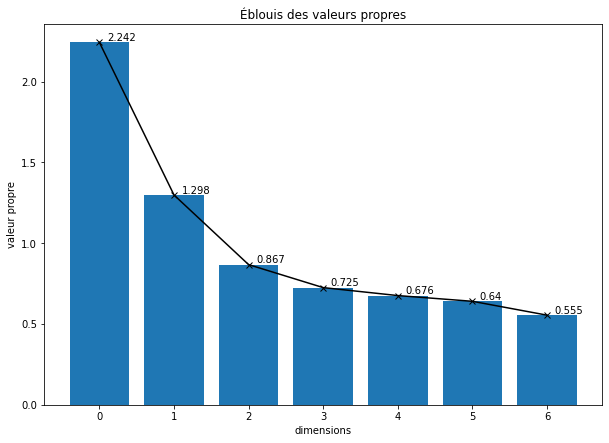

In [18]:
fig, ebl = plt.subplots(figsize = (10,7))

ebl.plot(range(p), lambdas, marker= 'x', c='k')

ebl.bar(range(p),lambdas[:])


for i,j in zip(range(p),np.around(lambdas, decimals=3)):
    ebl.annotate(str(j),xy=(i+0.1,j+0.01))




ebl.set_ylabel('valeur propre')
ebl.set_xlabel('dimensions')
ebl.set_title('Éblouis des valeurs propres')
plt.show()

## Tableau des valeurs propres et pourcentage de variance expliquée par chacune   

In [19]:
variance_percent = lambdas *100/p
cumulative_variance_percent = [ sum(variance_percent[:i]) for i in range(p+1)  ][1:]

pd.DataFrame(np.array([lambdas, variance_percent, cumulative_variance_percent]), index=['valeurs propres',  'pourcentage variance', 'variance cumulées'])


,0,1,2,3,4,5,6
valeurs propres,2.242191,1.298105,0.867270,0.725073,0.675838,0.640370,0.554644
pourcentage variance,32.031295,18.544356,12.389569,10.358189,9.654835,9.148148,7.923483
variance cumulées,32.031295,50.575651,62.965221,73.323410,82.978245,92.126393,100.049875


___
Par souci de simplicité, nous allons choisir de ne conserver que les deux premiers facteurs, ce qui représente en réalité une perte assez importante d'information puisque la variance cumulée des ces derniers n'est que de 50%. Nous perdons ainsi la moitié de l'information contenue dans nos données initiales.



## Choix des axes (vecteurs propres associés aux deux plus grandes valeurs propres)



In [20]:
df_vects[:2] 

,0,1,2,3,4,5,6
vecteur 1,0.213416,0.434549,0.412419,0.349743,0.372493,0.423832,0.393481
vecteur 2,-0.585041,0.003719,0.104775,0.550167,0.383220,-0.288808,-0.337318


## Coordonnées des données projetées sur les nouveaux axes



In [21]:
projected_data = Z.dot(Vh)
projected_data = pd.DataFrame(projected_data)
projected_data.columns = ['facteur %d' %i for i in range (1, p+1)]

projected_data

,facteur 1,facteur 2,facteur 3,facteur 4,facteur 5,facteur 6,facteur 7
0,-0.177804,0.863412,0.327264,-3.181603,-0.877378,-1.819867,-0.152284
1,1.524497,1.019957,-0.229207,0.616260,-0.811605,1.623599,0.044925
2,-0.574342,-0.120708,-0.258174,0.472383,0.370958,-0.225095,0.853995
3,2.410382,-1.755542,-0.249633,-0.581245,-0.837434,-1.120708,-1.161319
4,1.579079,0.972203,0.104765,-1.911237,0.603485,3.142415,-1.011015
...,...,...,...,...,...,...,...
2001,0.110583,0.514160,1.165691,0.201830,-0.264900,-0.007058,1.515608
2002,1.094790,0.696625,0.736690,-0.553235,-1.262612,0.733070,-0.570709
2003,3.535252,1.756861,1.515024,-0.496926,-1.025353,0.286502,-1.055630
2004,1.723216,1.270823,0.112262,-0.014376,-0.343710,2.111031,-1.105239


## Affichage du nuage de points 

In [22]:


output_notebook()


source = ColumnDataSource(
         data=dict(
            x=projected_data.iloc[:,0],
            y=projected_data.iloc[:,1],         
         ))

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),  
        ])

fig = figure(plot_width=600, 
             plot_height=400, 
             title= 'Nuage des individus',
             tools = "crosshair, pan, wheel_zoom, box_zoom, reset, hover")

fig.xaxis.axis_label = 'Dim 1'
fig.yaxis.axis_label = 'Dim 2'


fig.circle(projected_data.iloc[:,0], projected_data.iloc[:,1], size=3, alpha=0.6)

show(fig)

Loading BokehJS ...

In [23]:
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = Vh[k,:] * np.sqrt(lambdas[k])
pd.DataFrame(corvar)

,0,1,2,3,4,5,6
0,0.319567,-0.666563,0.471756,-0.000025,-0.319866,-0.345229,0.100090
1,0.650691,0.004237,-0.025742,-0.667525,0.332561,-0.133142,0.050069
2,0.617554,0.119375,-0.561386,0.171520,-0.209315,-0.407995,-0.223673
3,0.523704,0.626829,0.122269,0.123268,-0.174046,-0.007592,0.522326
4,0.557769,0.436620,0.523153,0.107715,0.021801,0.088694,-0.452903
5,0.634643,-0.329052,-0.198524,-0.106303,-0.337889,0.569161,-0.025004
6,0.589196,-0.384321,-0.029126,0.460399,0.523620,0.071636,0.116268


## Cercle de corélation

Les variables sont d'autant mieux représentés par le plan de projection que leur image sur le cerlcle de corrélation est proche du bord du cercle.
L'axe 2 oppose les variables d'image tel que y = 1 à celles proches de y = -1.


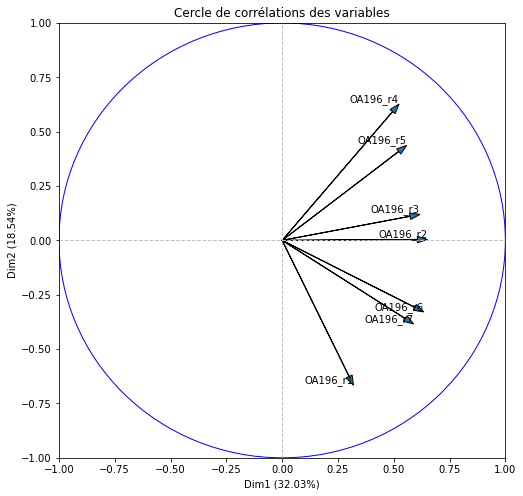

In [24]:
fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1)



for j in range(p): 
    plt.annotate(df.columns[j],(corvar[j,0]- 0.22,corvar[j,1]+0.01))
    axes.arrow(0,
             0,  
             corvar[j,0],
             corvar[j,1],
             length_includes_head=True,
             head_width=0.03,
             head_length=1.5 * 0.03)


plt.axvline(color='silver',linestyle='--',linewidth=1)
plt.axhline(color='silver',linestyle='--',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)

axes.set_ylabel('Dim2 ({}%)'.format(np.around(variance_percent[1], decimals=2)))
axes.set_xlabel('Dim1 ({}%)'.format(np.around(variance_percent[0], decimals=2)))
axes.set_title('Cercle de corrélations des variables')



plt.show()

## COS2

In [103]:
cos2var = corvar**2 
COS2_ = ['COS2_%d' %i for i in range (1, p+1)]
COS2 = dict((COS2_[i],cos2var[:,i]) for i in range(p))
COS2 = pd.DataFrame(COS2)
COS2.index = df.columns
COS2


,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6,COS2_7
OA196_r1,0.102123,0.444307,0.222554,6.218470e-10,0.102314,0.119183,0.010018
OA196_r2,0.423398,0.000018,0.000663,4.455892e-01,0.110597,0.017727,0.002507
OA196_r3,0.381372,0.014250,0.315154,2.941904e-02,0.043813,0.166460,0.050030
OA196_r4,0.274266,0.392915,0.014950,1.519510e-02,0.030292,0.000058,0.272824
OA196_r5,0.311107,0.190637,0.273689,1.160255e-02,0.000475,0.007867,0.205121
OA196_r6,0.402772,0.108275,0.039412,1.130026e-02,0.114169,0.323945,0.000625
OA196_r7,0.347153,0.147703,0.000848,2.119671e-01,0.274178,0.005132,0.013518


In [89]:
COS2_avec_pourcentage_variance = pd.concat([COS2, pd.DataFrame(np.mean(COS2)).T])
COS2_avec_pourcentage_variance.rename(index={0: 'Moyenne du $cos^2$ (pourcentage de variance exprimé)'}, inplace=True)
COS2_avec_pourcentage_variance

,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6,COS2_7
OA196_r1,0.102123,0.444307,0.222554,6.218470e-10,0.102314,0.119183,0.010018
OA196_r2,0.423398,0.000018,0.000663,4.455892e-01,0.110597,0.017727,0.002507
OA196_r3,0.381372,0.014250,0.315154,2.941904e-02,0.043813,0.166460,0.050030
OA196_r4,0.274266,0.392915,0.014950,1.519510e-02,0.030292,0.000058,0.272824
OA196_r5,0.311107,0.190637,0.273689,1.160255e-02,0.000475,0.007867,0.205121
OA196_r6,0.402772,0.108275,0.039412,1.130026e-02,0.114169,0.323945,0.000625
OA196_r7,0.347153,0.147703,0.000848,2.119671e-01,0.274178,0.005132,0.013518
Moyenne du $cos^2$ (pourcentage de variance exprimé),0.320313,0.185444,0.123896,1.035819e-01,0.096548,0.091481,0.079235


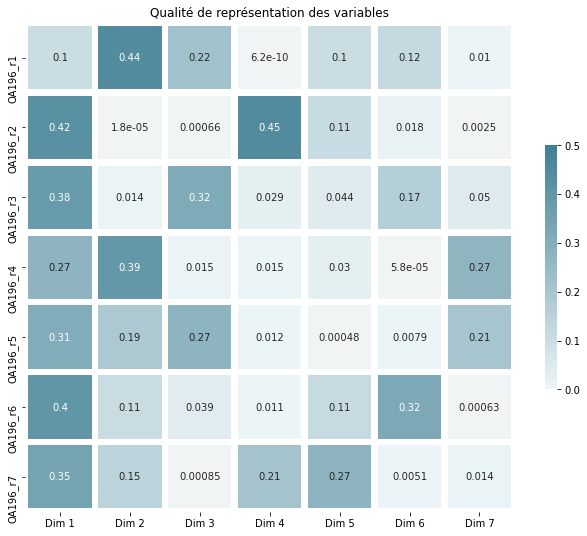

In [80]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(280, 220,sep = 1, as_cmap=True)


sns.heatmap(COS2, annot=True, xticklabels = ['Dim %d' %i for i in range (1, p+1)], cmap=cmap, vmin=0, vmax=.5, center=0,
            square=True, linewidths=5.75, cbar_kws={"shrink": .5})

ax.set_title('Qualité de représentation des variables')


plt.show()

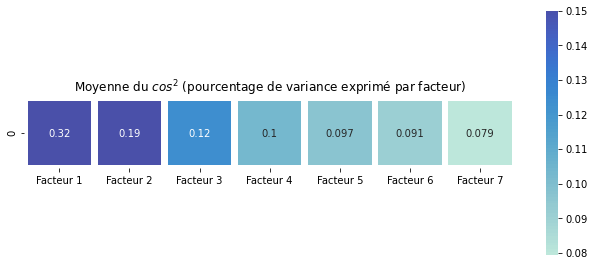

In [102]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 200, as_cmap=True)


sns.heatmap(pd.DataFrame(np.mean(COS2)).T, annot=True, xticklabels = ['Facteur %d' %i for i in range (1, p+1)],  vmax=.15, center=0.20,
            square=True, linewidths=5.75, cbar_kws={"shrink": .5})

ax.set_title('Moyenne du $cos^2$ (pourcentage de variance exprimé par facteur)')


plt.show()